In [1]:
# Importing relevent modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [4]:
# loading the dataset
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

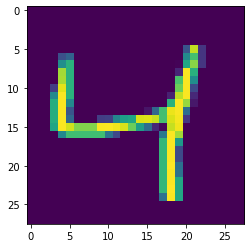

In [5]:
# printing one train image
plt.imshow(X_train[2])
plt.show()

In [6]:
# now see the label of the above image
print(y_train[2])

4


In [7]:
print ('The shape of X is: ' + str(X_train.shape))
print ('The shape of y is: ' + str(y_train.shape))

The shape of X is: (60000, 28, 28)
The shape of y is: (60000,)


Now we need to reshape our data set inorder to apply for ANN model.

As the ANN model receive data data in vector form so the data is converted into vector form.

In [8]:
# converting the 28 by 28 image matrix into a single vector of 784 entries
feature_vector_length = 784
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)
input_shape = (feature_vector_length,)
X_train.shape

(60000, 784)

Now we can build the model. The model type that we will be using is Sequential.

Sequential is the easiest way to build a model in Keras. 

It allows you to build a model layer by layer.We use the ‘add()’ function that adds layers to our neural network.

Dense specifies fully connected layers.Activation Function is used for introducing non-linearity

In [10]:
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

Now we need to specify the loss function and the optimizer, that is done by compile function available in keras.

Here loss is cross entropy. Categorical cross-entropy states that we have multiple classes.

The optimizer used is Adam. Metrics is used to specify how we want to judge our models performance.

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Now training the model.

model.fit function is used to train the model.

In [12]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.9978 - accuracy: 0.7760
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3268 - accuracy: 0.9202
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2066 - accuracy: 0.9484
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1634 - accuracy: 0.9596
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1335 - accuracy: 0.9662
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1126 - accuracy: 0.9709
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1107 - accuracy: 0.9727
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0947 - accuracy: 0.9773
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0857 - accuracy: 0.9787
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.082

Now lets see for CNN model. 

All the preprocessing taks will be sames as ANN, but difference is that CNN receive data in image form(2-D) form.

so data is reshaped into 2-D form

In [13]:
img_width, img_height = 28, 28
X_train = X_train.reshape(X_train.shape[0],  img_width, img_height,1)
X_test = X_test.reshape(X_test.shape[0], img_width, img_height,1)
input_shape = ( img_width, img_height,1,)
X_train.shape

(60000, 28, 28, 1)

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.6288 - accuracy: 0.9189
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0956 - accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0771 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0661 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0581 - accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0548 - accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0508 - accuracy: 0.9847
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0497 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0474 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 58s 31m